In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random as r
import math
from sklearn.metrics import mean_squared_error

In [5]:
def standardize(x):
    return (x - np.mean(x, axis=0)) / np.std(x, axis=0)

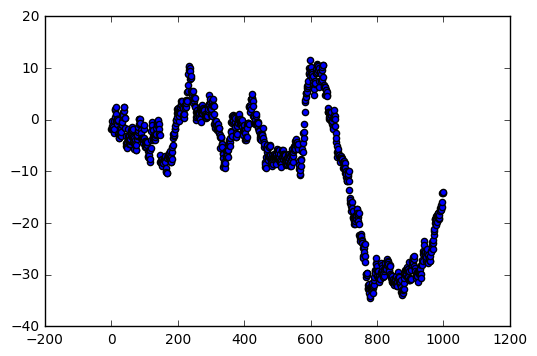

In [6]:
num_data_points = 1000

y = np.random.randn(num_data_points, 1)
# y = np.random.normal(loc=0.0, scale=0.1, size=(num_data_points, 1))

y = np.cumsum(y).reshape(num_data_points, 1)
x = np.arange(num_data_points, dtype='float32').reshape(num_data_points, 1)

plt.scatter(x, y)
plt.show()

In [7]:
def shuffle_data(x, y):
    random_idxs = np.arange(x.shape[0])
    np.random.shuffle(random_idxs)

    x = x[random_idxs]        
    y = y[random_idxs]

[-8.91700343 -9.26308976]
MSE: 77.0852494257
77.9084463291


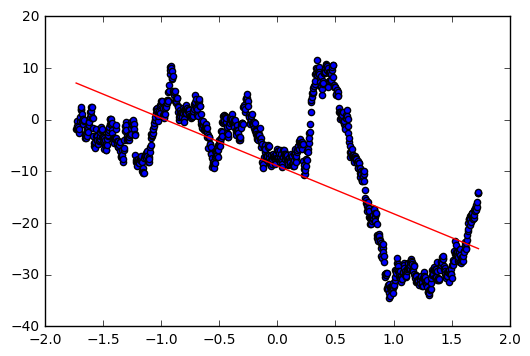

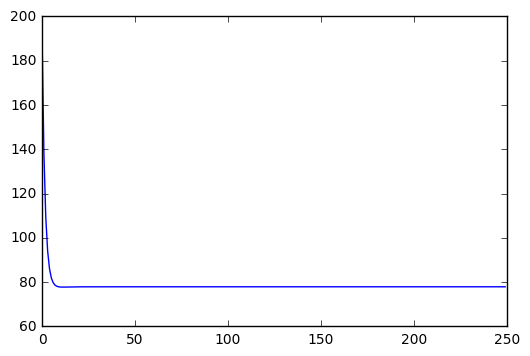

In [8]:
def fit_linear_regression(x, y, batch_size, lr, num_epochs):
    x = standardize(x)
    num_samples = x.shape[0]
    
    # Append columns of 1s to the dataset (to train intercept term).
    x_with_bias = np.append(np.ones((num_samples, 1)), x, axis=1)
    
    # Initialize random weights.
    weights = np.random.randn(x_with_bias.shape[1])
        
    # Handle case when num_samples < batch_size.
    num_batches = max(1, int(num_samples / batch_size))
    
    cost_function_values = []
    for e in range(num_epochs):
        shuffle_data(x_with_bias, y)        
        epoch_losses = []
        for i in range(num_batches):
            start_idx = i * batch_size
            end_idx = min((i + 1) * batch_size, num_samples)
            
            batch = x_with_bias[start_idx: end_idx]
            y_batch = y[start_idx: end_idx]

            pred = np.sum(weights * batch, axis=1, keepdims=True)
            
            error = pred - y_batch
            # Update weights.
            weights -= lr * np.mean(error * batch, axis=0)
            
            batch_squared_error = np.mean(error ** 2)
            epoch_losses.append(batch_squared_error)

        cost_function_values.append(sum(epoch_losses) / len(epoch_losses))

    return weights, cost_function_values

weights, cost_function_values = fit_linear_regression(x, y, 32, 0.01, 250)

print(weights)

# Evaluate model.
x = standardize(x)    
x_with_bias = np.append(np.ones((x.shape[0], 1)), x, axis=1)
    
pred = np.sum(weights * x_with_bias, axis=1)

mse = mean_squared_error(y, pred)

print('MSE:', mse)
print(cost_function_values[-1])
plt.scatter(x, y)
plt.plot(x, pred, color='red')
plt.show()

plt.plot(cost_function_values)
plt.show()


[-8.62663574] [-8.72273211]
MSE: 76.7749211012
[ 77.44744247]


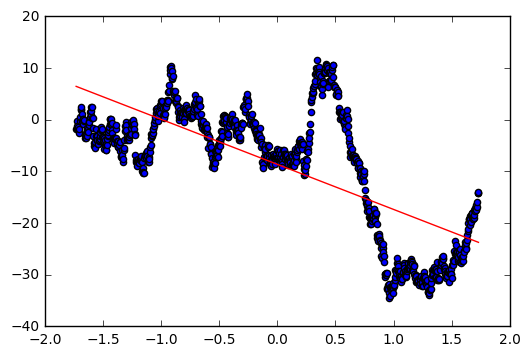

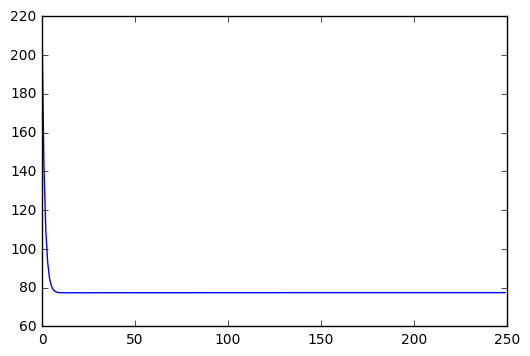

In [9]:
def fit_linear_regression_slow(x, y, batch_size, lr, num_epochs):
    # Initialize coefficients with random values
    b0, b1 = r.random(), r.random()

    cost_function_values = []

    x = standardize(x)

    num_batches = int(num_data_points / batch_size)

    for e in range(num_epochs):
        shuffle_data(x, y)
        epoch_losses = []
        nn = 0
        for i in range(0, num_data_points, batch_size):
            error0, error1 = 0, 0
            batch_squared_error = 0
            num_processed_in_batch = 0
            for b in range(batch_size):
                if i + b == num_data_points:
                    break

                num_processed_in_batch += 1
                pred = b0 + b1 * x[i + b]
                error = pred - y[i + b]
                batch_squared_error += error ** 2

                error0 += error
                error1 += error * x[i + b]

            b0 = b0 - lr * error0 / num_processed_in_batch
            b1 = b1 - lr * error1 / num_processed_in_batch
            if num_processed_in_batch:
                epoch_losses.append(batch_squared_error / num_processed_in_batch)

        if epoch_losses:
            cost_function_values.append(sum(epoch_losses) / len(epoch_losses))
            
    return b0, b1, cost_function_values

b0, b1, cost_function_values = fit_linear_regression_slow(x, y, 32, 0.01, 250)

print(b0, b1)

pred = []
for el in x:
    pred.append(b0 + b1 * el)

mse = mean_squared_error(y, pred)
print('MSE:', mse)
print(cost_function_values[-1])
plt.scatter(x, y)
plt.plot(x, pred, color='red')
plt.show()

plt.plot(cost_function_values)
plt.show()

In [14]:
%timeit fit_linear_regression(x, y, 32, 0.01, 250)
%timeit fit_linear_regression_slow(x, y, 32, 0.01, 250)

100 loops, best of 3: 12.9 ms per loop
100 loops, best of 3: 17.5 ms per loop
